In [1]:
from gurobipy import*
import matplotlib.pyplot as plt

In [2]:
def plot_graph(s,V,A,C,T,a,k,color_arcs = False,Route=None):

    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14,2*len(C)))

    if color_arcs: cols = {"D":"#D60093","W":"darkorange","B":"gold","E":"#00CCFF"}
    else: cols = {"D":"darkgray","W":"darkgray","B":"darkgray","E":"darkgray"}

    ''' D: traveling arcs from source node '''
    for arc in A["D"]:
        ax.plot([arc[0][1],arc[1][1]],[arc[0][0],arc[1][0]],linestyle="-",color=cols["D"],marker=None)

    ''' W: charging arc of the same vehicle '''
    for arc in A["W"]:
        ax.plot([arc[0][1],arc[1][1]],[arc[0][0],arc[1][0]],linestyle="-",color=cols["W"],marker=None)

    ''' B: transition arcs between vehicles '''
    for arc in A["B"]:
        ax.plot([arc[0][1],arc[1][1]],[arc[0][0],arc[1][0]],linestyle="-",color=cols["B"],marker=None)

    ''' B: transition arcs between vehicles '''
    for arc in A["E"]:
        ax.plot([arc[0][1],arc[1][1]],[arc[0][0],arc[1][0]],linestyle="-",color=cols["E"],marker=None)

    if Route is not None:
        for i in range(len(Route)-1):
            arc1 = Route[i]; arc2 = Route[i+1]
            ax.plot([arc1[1],arc2[1]],[arc1[0],arc2[0]],linestyle="-",color="limegreen",linewidth=2,marker=None)

    ''' Source node '''
    ax.plot(V["s"][1],V["s"][0],marker="p",markersize=20,color="forestgreen")

    ''' Charging nodes '''
    for q in V["Q"]:
        ax.plot(q[1],q[0],color="navy",marker="o",markersize=18)

    ''' Sink node '''
    ax.plot(V["e"][1],V["e"][0],marker="p",markersize=20,color="orangered")

    ax.set_xlim(-0.5,T[-1]+1.5); ax.set_xlabel("time period",fontsize=14)
    ax.set_ylim(0.5,len(C)+0.5); ax.set_ylabel("vehicle",fontsize=14)

    ax.set_xticks(T); ax.set_xticklabels([f"t{t}" for t in T],fontsize=14)
    ax.set_xticks([t+0.5 for t in range(len(T)+1)],minor=True); ax.set_xticklabels([],minor=True)

    ax.set_yticks(C); ax.set_yticklabels([f"v{c}" for c in C], fontsize=14)
    ax.set_yticks([c+0.5 for c in range(len(C))],minor=True); ax.set_yticklabels([],minor=True)

    ax.invert_yaxis()
    ax.grid(which="minor",axis="x")

In [12]:
C = list(range(1,5))
T = list(range(1,11))
cd = 0.041; cw = 0.0388

k = dict(zip([(c,1) for c in C],[4,3,3,2]))
a = dict(zip([(c,1) for c in C],[1,3,4,8]))
d = dict(zip([(c,1) for c in C],[10,20,30,40]))
p = dict(zip([(c,1) for c in C],[130+d[c,1] for c in C]))

In [9]:
def get_graph(s,C,T,a,k,d,p,cd,cw,pi,sigma):

    def feas_B(n1,n2):
        return (n1[0] != n2[0]) and (n2[1] == max(n1[1]+1,a[n2[0],s])) and (a[n1[0],s] <= a[n2[0],s]) and (n1[1]-a[n1[0],s]+1 >= k[n1[0],s]) and (n2[1]+k[n2[0],s]-1<=T[-1])

    Q = [(c,t) for c in C for t in T if t >= a[c,s]]
    V = {"s":((C[-1]+C[0])/2,0),"Q":Q,"e":((C[-1]+C[0])/2,T[-1]+1)}

    D = [(V["s"],n) for n in Q if n[1] == a[n[0],s]]
    W = [(n1,n2) for n1 in Q for n2 in Q if n1[0] == n2[0] and n2[1] == n1[1]+1]
    B = [(n1,n2) for n1 in Q for n2 in Q if feas_B(n1,n2)]
    E = [(n,V["e"]) for n in Q if n[1]-a[n[0],s]+1>=k[n[0],s]]

    A = {"D":D,"W":W,"B":B,"E":E}

    rc = [cd*d[j[0],s]-pi[j[0]]-sigma[s] for (i,j) in A["D"]] + \
        [cw*p[i[0],s]/k[i[0],s] for (i,j) in A["W"]] + \
        [cw*p[i[0],s]/k[i[0],s]+cd*d[j[0],s]-pi[j[0]] for (i,j) in A["B"]] + \
        [cw*p[i[0],s]/k[i[0],s] for (i,j) in A["E"]]

    return V,A,rc
    

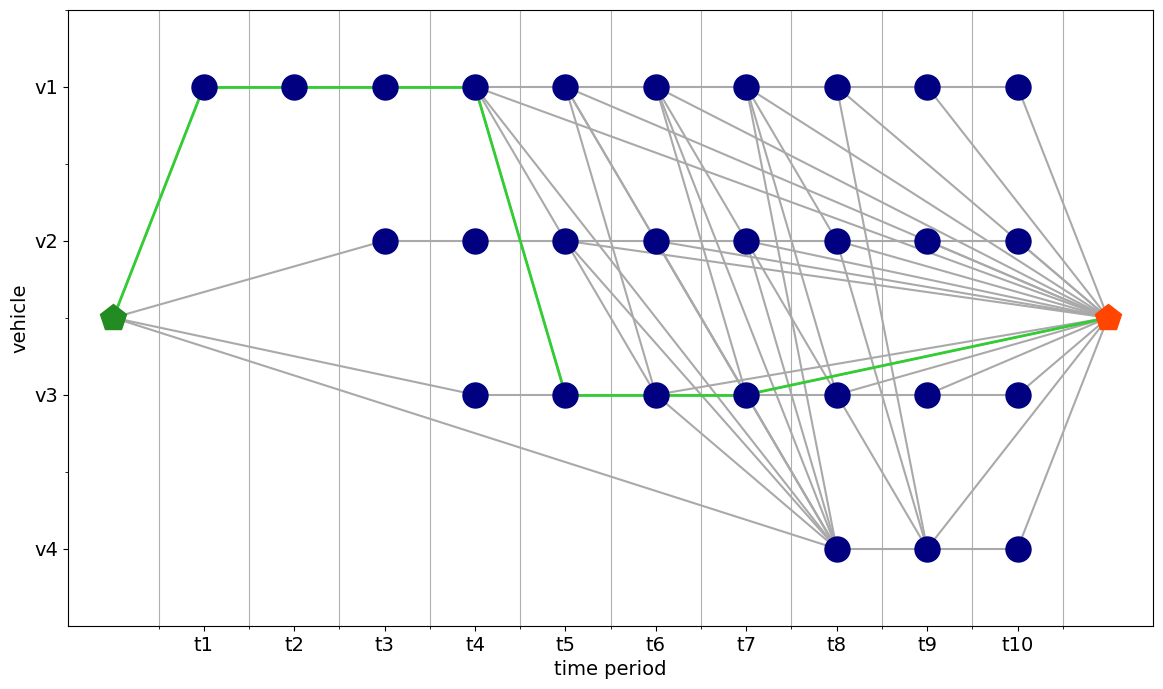

In [13]:
V,A,rc = get_graph(1,C,T,a,k,d,p,cd,cw,{c:0 for c in C},{1:0})
route = [(2.5,0),(1,1),(1,2),(1,3),(1,4),(3,5),(3,6),(3,7),(2.5,T[-1]+1)]
plot_graph(1,V,A,C,T,a,k,Route=route)